In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [7]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Power Bi\Capstone Project\CP_1_Proposal_On_TelecomCustomer\churn.csv")
pd.set_option('display.max_columns',None)
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31.0,Deal 1,Yes,No,Yes,Fiber Optic,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,95.10,6683.40,0.00,0.0,631.72,7315.12,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9.0,Deal 5,Yes,No,Yes,DSL,No,No,Yes,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,49.15,169.05,0.00,10.0,122.37,301.42,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28.0,Deal 1,Yes,Yes,Yes,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Two Year,Yes,Bank Withdrawal,116.05,8297.50,42.57,110.0,1872.98,10237.91,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12.0,NaN,Yes,No,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,84.40,5969.30,0.00,0.0,219.39,6188.69,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27.0,Deal 2,Yes,No,Yes,DSL,Yes,No,No,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,72.60,4084.35,0.00,140.0,332.08,4556.43,Stayed,Others,Others


In [101]:
# Data Preprocessing
# Drop columns that won't be used for prediction
cols_to_drop = ['Customer_ID', 'Churn_Category', 'Churn_Reason']
data = data.drop(columns=[col for col in cols_to_drop if col in data.columns])


# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

print(data['Customer_Status'])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

0        Stayed
1       Churned
2        Stayed
3        Stayed
4        Stayed
         ...   
3133    Churned
3134     Stayed
3135    Churned
3136     Stayed
3137        NaN
Name: Customer_Status, Length: 3138, dtype: object


In [103]:
data['Customer_Status'].value_counts()


Customer_Status
0.0    2224
1.0     913
Name: count, dtype: int64

In [115]:
print("NaNs in target after mapping:", data['Customer_Status'].isna().sum())
print(data.dropna(subset=['Customer_Status']))

NaNs in target after mapping: 0
      Gender  Age  Married  State  Number_of_Referrals  Tenure_in_Months  \
0          0   30        1     11                    0              31.0   
1          1   51        0     15                    5               9.0   
2          0   43        1     21                    3              28.0   
3          1   35        0     12                   10              12.0   
4          1   75        1     17                   12              27.0   
...      ...  ...      ...    ...                  ...               ...   
3132       1   74        1     21                    6              31.0   
3133       0   73        1      9                    9              19.0   
3134       1   24        1     19                    1               2.0   
3135       0   58        1     10                    3              30.0   
3136       0   39        0     18                    3               6.0   

      Value_Deal  Phone_Service  Multiple_Lines  Intern

In [117]:
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
#Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model

Confusion Matrix:
[[405  31]
 [ 74 118]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       436
         1.0       0.79      0.61      0.69       192

    accuracy                           0.83       628
   macro avg       0.82      0.77      0.79       628
weighted avg       0.83      0.83      0.83       628



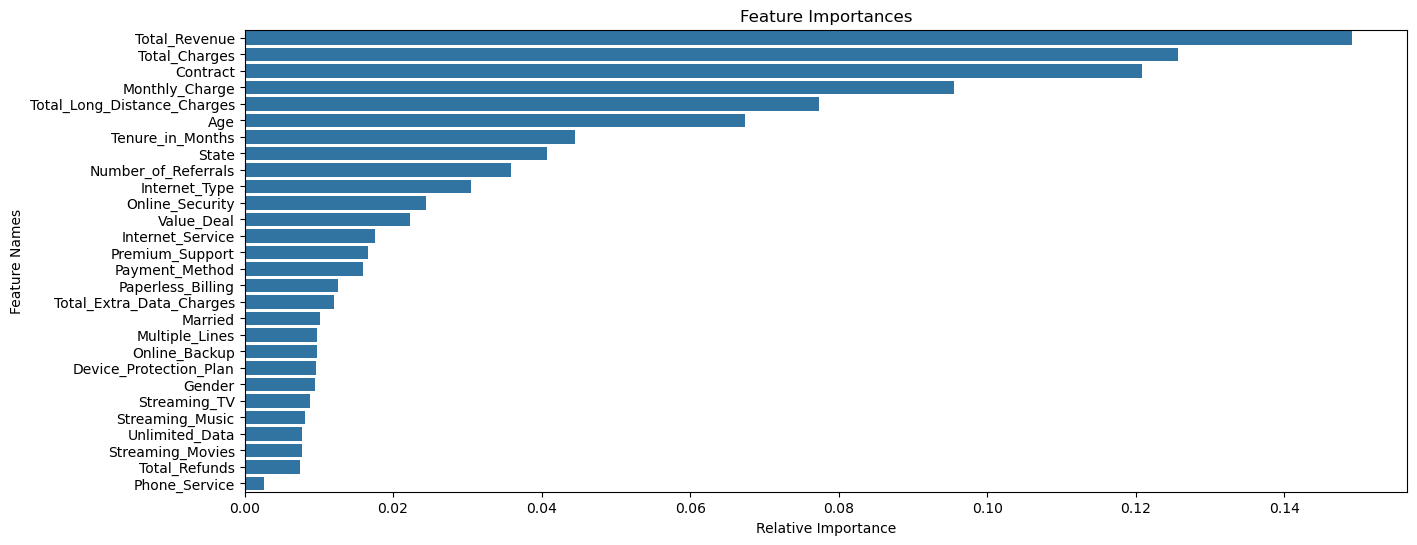

In [121]:

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

### Use Model for Prediction on New Data

In [129]:
new_data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Power Bi\Capstone Project\CP_1_Proposal_On_TelecomCustomer\Joined.csv")

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv("Prediction.csv")

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre